We compare SGDEM with SGDM, Adam, AdaBelief, AdaBound, RAdam, Yogi and AEGD in six image classification tasks: VGG-16, ResNet-34, DenseNet-121 on CIFAR10 and CIFAT100. This repo heavily depends on the official implementation of [AEGD](https://github.com/txping/AEGD) and [AdaBelief](https://github.com/juntang-zhuang/Adabelief-Optimizer/tree/update_0.2.0/PyTorch_Experiments).

In this setting, the mini-batch size is set as 128 and the weight decay is set as $5\times 10^{-4}$ for all tasks. We only tune the base learning rate and report the one that achieves the best final generalization performance for each method.

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
import numpy as np

plt.rcParams.update({'font.size': 12})

In [2]:
def get_curve_data(pretrained=True, dataset='cifar10', model='', optim=''):
    folder_path = 'curve'
    if pretrained:
        folder_path = os.path.join(folder_path, 'pretrained')
        
    filenames = [name for name in os.listdir(folder_path) 
                 if dataset in name #name.startswith('-'.join([dataset,model,optim]))]
                 and model in name
                 and optim in name]
    keys = [name for name in filenames]
    paths = [os.path.join(folder_path, name) for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

def plot(pretrained=False, dataset='cifar10', model='', optim='', curve_type='train', ylim=[60,95]):
    
    curve_data = get_curve_data(pretrained, dataset=dataset, model=model, optim=optim)
    curve_data_keys = curve_data.keys()

    plt.figure( figsize=(8,6))
    for key in curve_data_keys:
        plt.plot(np.array(curve_data[key]['{}'.format(curve_type)]), label='-'.join(key.split('-')[2:]))
       
    
    #plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss' if curve_type=='train_loss' else 'Test Accuracy %')
    plt.ylim(ylim)
    plt.grid(ls='--')
    plt.legend()
    plt.tight_layout()

In [15]:
def plotrained(folder='curve/pretrained', dataset='cifar10', model='VGG16', curve_type='test_acc', ylim=[40,75],
               optimizers=['SGDEM','AEGD','SGDM','AdaBelief','AdaBound','RAdam','Yogi','Adam'], loc= 'upper right'):
    filenames = [name for name in os.listdir(folder) if name.startswith('-'.join([dataset,model]))]
    paths = [os.path.join(folder, name) for name in filenames]
    keys = [name.split('-')[2] for name in filenames]
    curve_data = {key: torch.load(fp) for key, fp in zip(keys, paths)}
    
    plt.figure(figsize=(5,4))
        
    for optim in optimizers: 
        if optim == 'SGDEM':
            linestyle = '-'
        else:
            linestyle = '--'
        plt.plot(np.array(curve_data[optim]['{}'.format(curve_type)]), label=optim, linestyle=linestyle)
    
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss' if curve_type=='train_loss' else 'Test Accuracy %')
    plt.ylim(ylim)
    plt.grid(ls='--')
    plt.legend(loc=loc)
    plt.tight_layout()

## CIFAR-10

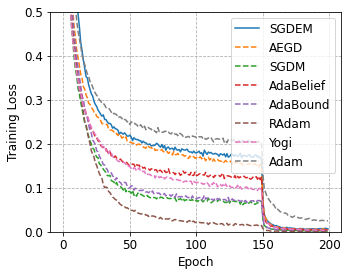

In [6]:
plotrained(dataset='cifar10', model='VGG16', curve_type='train_loss', ylim=[0,0.5])

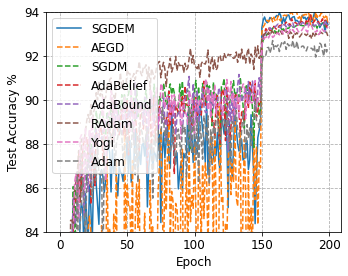

In [18]:
plotrained(dataset='cifar10', model='VGG16', curve_type='test_acc', ylim=[84,94], loc='upper left')

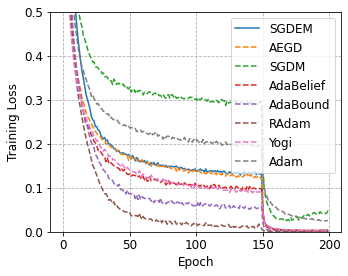

In [8]:
plotrained(dataset='cifar10', model='ResNet34', curve_type='train_loss', ylim=[0,0.5])

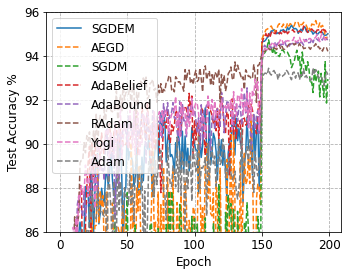

In [19]:
plotrained(dataset='cifar10', model='ResNet34', curve_type='test_acc', ylim=[86,96], loc='upper left')

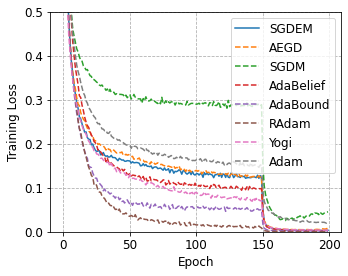

In [10]:
plotrained(dataset='cifar10', model='DenseNet121', curve_type='train_loss', ylim=[0,0.5])

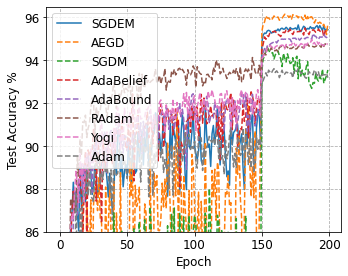

In [20]:
plotrained(dataset='cifar10', model='DenseNet121', curve_type='test_acc', ylim=[86,96.5], loc='upper left')

## CIFAR-100

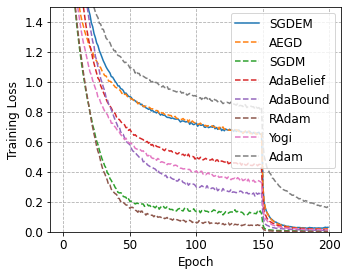

In [12]:
plotrained(dataset='cifar100', model='VGG16', curve_type='train_loss', ylim=[0,1.5])

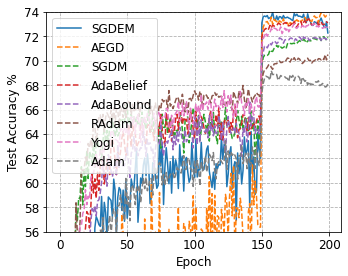

In [21]:
plotrained(dataset='cifar100', model='VGG16', curve_type='test_acc', ylim=[56,74], loc='upper left')

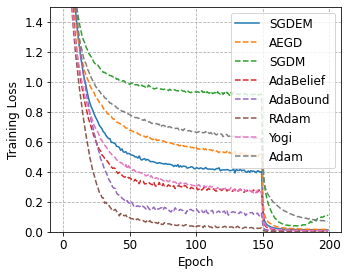

In [22]:
plotrained(dataset='cifar100', model='ResNet34', curve_type='train_loss', ylim=[0,1.5])

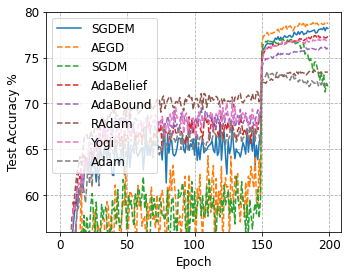

In [23]:
plotrained(dataset='cifar100', model='ResNet34', curve_type='test_acc', ylim=[56,80], loc='upper left')

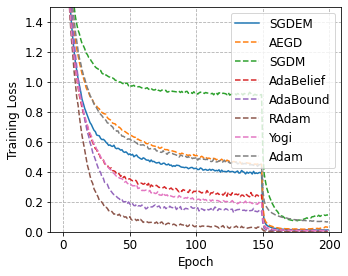

In [24]:
plotrained(dataset='cifar100', model='DenseNet121', curve_type='train_loss', ylim=[0,1.5])

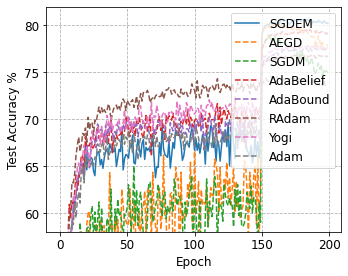

In [25]:
plotrained(dataset='cifar100', model='DenseNet121', curve_type='test_acc', ylim=[58,82])

## Energy

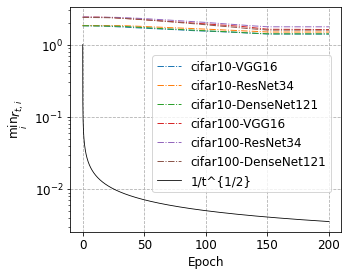

In [27]:
fig, ax = plt.subplots(figsize=(5,4))

curve_data = get_curve_data(pretrained=True, dataset='', model='', optim='SGDEM')
#curve_data_keys = curve_data.keys()
curve_data_keys = ['cifar10-VGG16-SGDEM-lr0.2-wd0.0005',
                   'cifar10-ResNet34-SGDEM-lr0.2-wd0.0005',
                   'cifar10-DenseNet121-SGDEM-lr0.2-wd0.0005',
                   'cifar100-VGG16-SGDEM-lr0.2-wd0.0005',
                   'cifar100-ResNet34-SGDEM-lr0.2-wd0.0005',
                   'cifar100-DenseNet121-SGDEM-lr0.2-wd0.0005'
                  ]

for key in curve_data_keys:
    cv = curve_data[key]
    rs = [item for sublist in cv['energys'][0:200] for item in sublist]
    ax.plot(np.array(rs), linestyle='-.', lw=1, label='-'.join(key.split('-')[:2]))

ax.plot(1/np.arange(1,391*200)**0.5, lw=0.8, linestyle='-', color='k', label='1/t^{1/2}')

ax.set_xlabel('Epoch')
ax.set_ylabel(r'$\min_i r_{t,i}$')
#plt.xscale('log')
ax.set_yscale('log')
ax.set_xticks(391*np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50))
ax.grid(ls='--')
ax.legend(loc='best', bbox_to_anchor=(0.28, 0.28, 0.4, 0.4))
fig.tight_layout()